In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load csv file from GitHub into a DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/saleha-12/bike_sharing/refs/heads/main/cleaned_hourly_bike_data.csv')

# Check top 3 rows of DataFrame
df.head(3)

,instant,date,season,year,month,hour,weekday,weather,temperature,humidity,windspeed,count
0,1,2011-01-01,1,0,1,0,6,1,0.24,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,6,1,0.22,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,6,1,0.22,0.80,0.0,32


In [3]:
# Check number of rows and columns
df.shape

(16874, 12)

In [4]:
# Check column names and types
df.info()

# 'dteday' column is a string, which will need to be converted to datetime if using date in calculations
# Columns 'temp', 'atemp', 'hum', and 'windspeed' are floats
# The remaining columns are all integers
# This dataset does not have any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16874 entries, 0 to 16873
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      16874 non-null  int64  
 1   date         16874 non-null  object 
 2   season       16874 non-null  int64  
 3   year         16874 non-null  int64  
 4   month        16874 non-null  int64  
 5   hour         16874 non-null  int64  
 6   weekday      16874 non-null  int64  
 7   weather      16874 non-null  int64  
 8   temperature  16874 non-null  float64
 9   humidity     16874 non-null  float64
 10  windspeed    16874 non-null  float64
 11  count        16874 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.5+ MB


In [5]:
# Check summary stats (also checking for outliers)
df.describe()

# Some observations: there is a significant difference between the number of 'casual' and 'registered' users, seen when comparing min/max and the percentile groupings.
# Column 'weekday' has integeres between 0-6, so week starts at 0
# Column 'weathersit' has no rows that are '4', meaning there was no 'Heavy Rain' during the entire time period of the dataset
# Column 'cnt' min in 22, and max is 8714, meaning significant fluctuation of total rental bikes throughout time period
# No outliers spotted, as all columns make sense in regards to the numbers inputted and what ethe column represents

,instant,season,year,month,hour,weekday,weather,temperature,humidity,windspeed,count
count,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
mean,8542.168899,2.490399,0.487733,6.513275,11.458101,2.997748,1.430663,0.492650,0.630412,0.189619,172.710146
std,5007.766040,1.111966,0.499864,3.462438,6.962144,2.013054,0.642689,0.192455,0.192600,0.122460,155.020918
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,1.000000
25%,4219.250000,1.000000,0.000000,4.000000,5.000000,1.000000,1.000000,0.340000,0.480000,0.104500,38.000000
50%,8438.500000,2.000000,0.000000,7.000000,11.000000,3.000000,1.000000,0.500000,0.630000,0.179100,135.000000
75%,12832.750000,3.000000,1.000000,10.000000,18.000000,5.000000,2.000000,0.640000,0.790000,0.253700,265.750000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,6.000000,4.000000,1.000000,1.000000,0.850700,642.000000


In [6]:
# Check if any duplicates
df.duplicated().sum()

# No duplicates

0

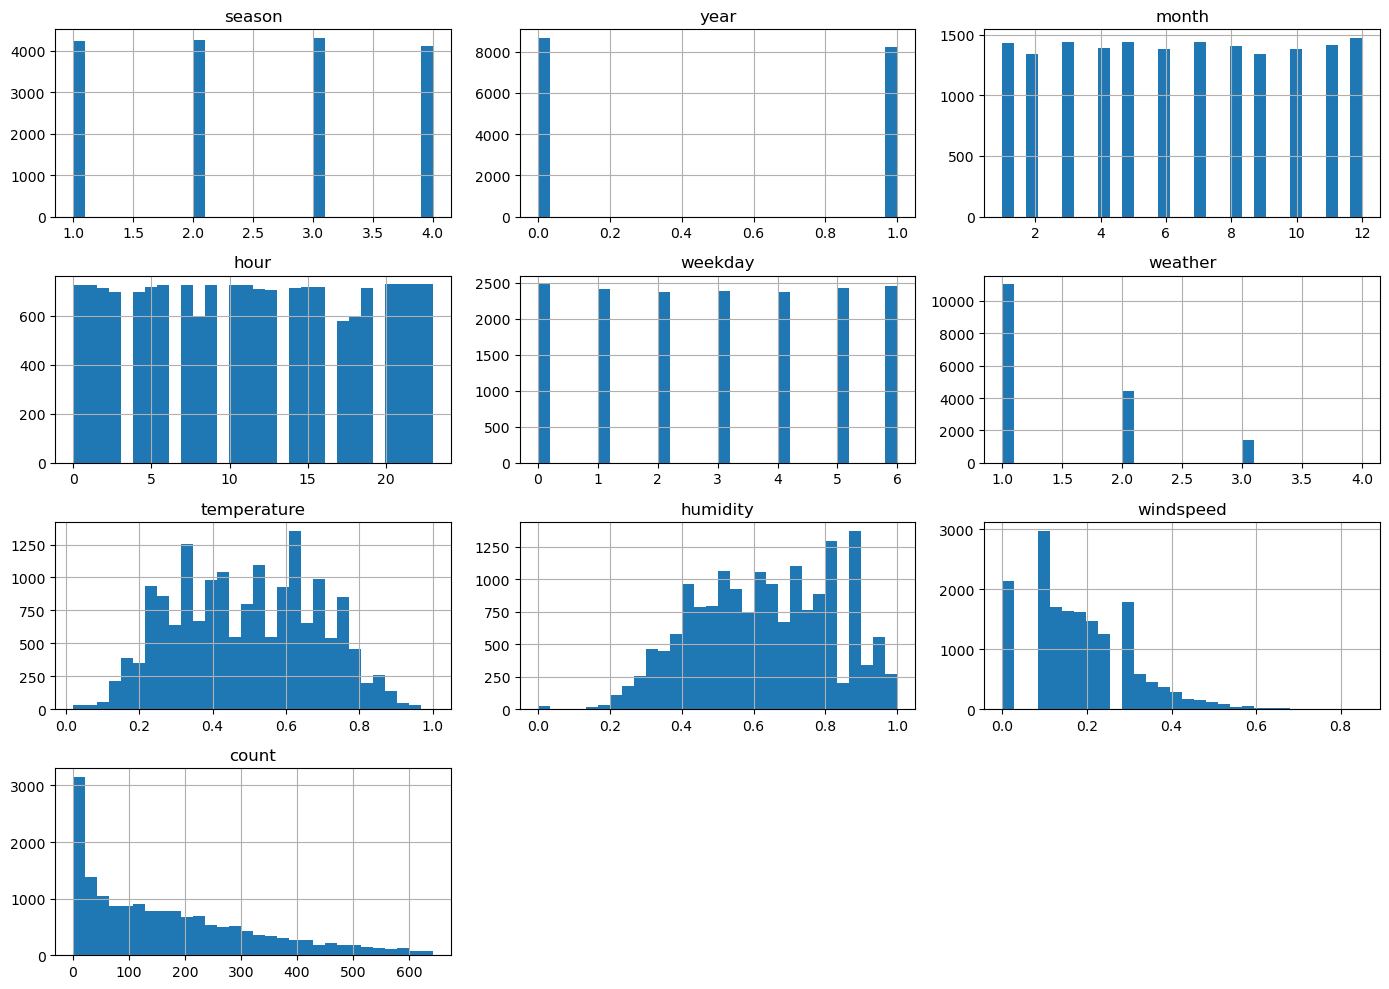

In [12]:
# Check and visualize distribution of features
df.drop(columns=["instant"]).hist(figsize=(14, 10), bins=30)  
# prevent overlap
plt.tight_layout() 
plt.show()

# Some observations: most common weather type was '1' for clear, followed by '2' for misty which occurred about half the time as '1', very few '3' for light snow, and no '4' at all for heavy rain.
# Significantly more 'registered' users

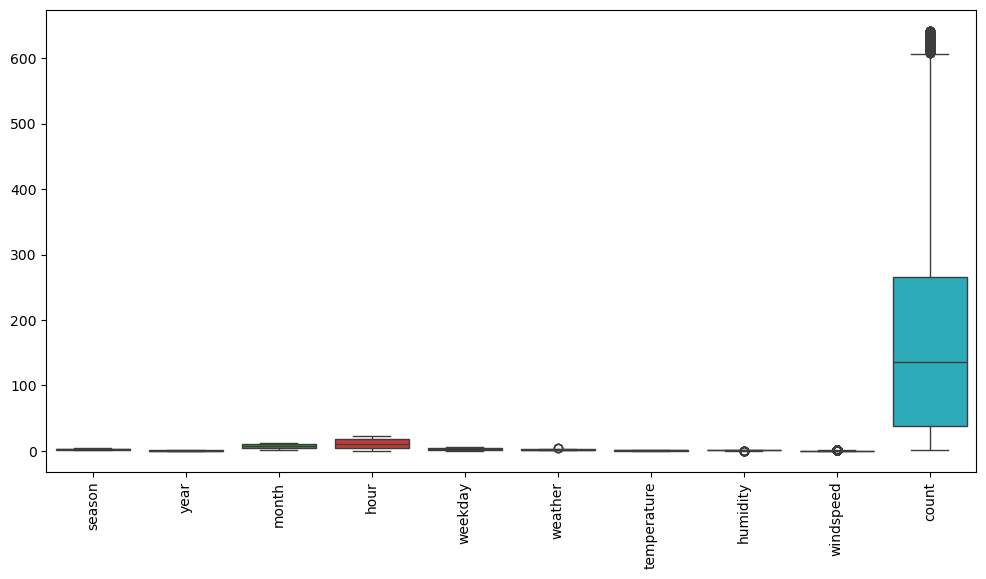

In [13]:
# Visualizing and detecting outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["instant"]))
plt.xticks(rotation=90)
plt.show()

# 'casual' column shows a large number of outliers, which most likely means there are certain times when these casual users are renting bikes more often, which makes the fluctuations
# wider than the 'registered' users.

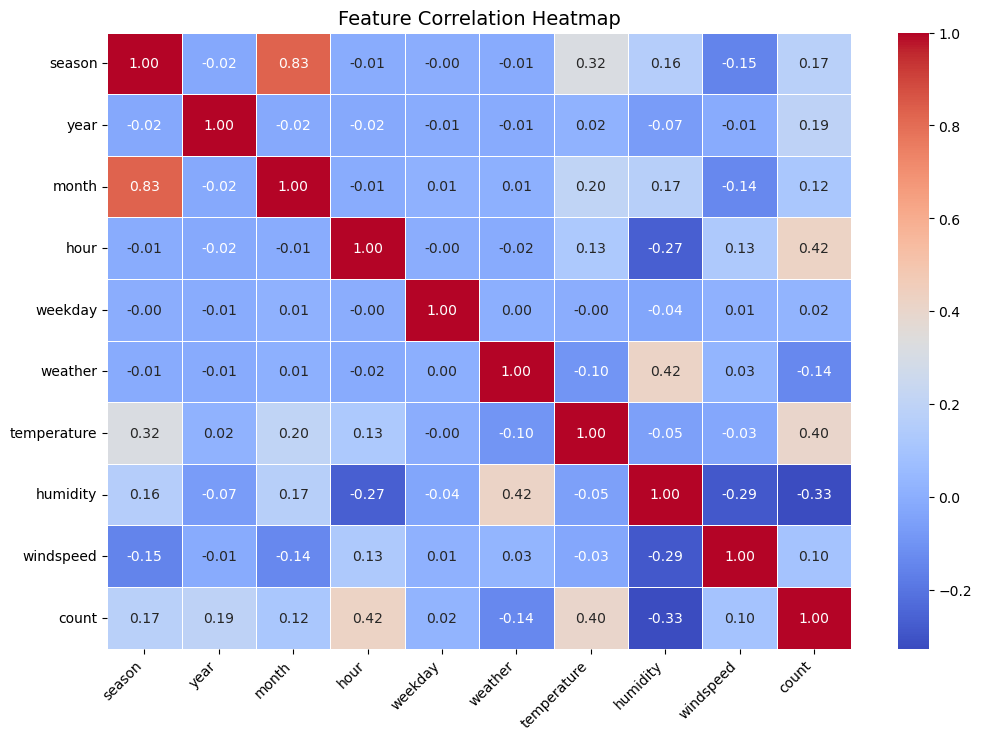

In [14]:
# Correlation matrix to check relationships between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=["date", "instant"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.xticks(rotation=45, ha='right')
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# Initial observations: season, year, weathersit, temp, atemp, and windspeed affect the number of rentals ('cnt')